In [6]:
#importando firebird e pandas
import firebirdsql
import pandas as pd
import matplotlib


#conexão ao banco de dados
con = firebirdsql.connect(user='SYSDBA', 
password='Laika06', 
database='C:\\RDR\DADOS\\Catedral.FDB', 
host="localhost", charset="ansi")


cur=con.cursor()
""""
cur.execute('select * from sistb001_operador')

for c in cur.fetchall():
    print(c)
print('Finalizado')    """ 


'"\ncur.execute(\'select * from sistb001_operador\')\n\nfor c in cur.fetchall():\n    print(c)\nprint(\'Finalizado\')    '

In [ ]:
#query no banco de dados
df = pd.read_sql_query("select * from sistb001_operador",con)
print(df.head())

df_index = pd.read_sql_query("select * from sistb001_operador", con, index_col="IC_ATIVO")
print(df_index.head())

query = '''
SELECT f.no_funcionario,
       fu.no_funcao

FROM sistb011_funcionario f
INNER JOIN sistb009_funcao fu
ON f.nu_funcao = fu.nu_funcao;

'''

In [ ]:
df = pd.read_sql_query (query, con)
print(df.head())


In [24]:
query_venda_funcionario = '''
SELECT v.co_operador as Funcionario, count(*) as Vendas FROM sistb007_venda v
GROUP BY v.co_operador
ORDER BY count(*) DESC;
'''

venda = pd.read_sql_query(query_venda_funcionario, con)
print(venda.head())

  FUNCIONARIO  VENDAS
0  SUPORTERDR     230
1       CAIXA      42
2     DANIELA      13
3      CAIXA1       5
4       LUCAS       3


c:\Users\suporte10\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:ylabel='Vendas'>

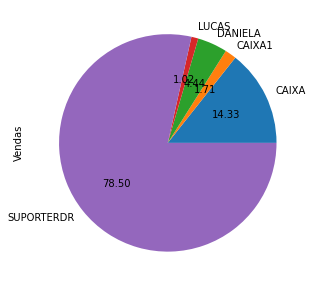

In [25]:
funcionarios_venda = venda.groupby('FUNCIONARIO')['VENDAS'].mean()
funcionarios_venda.head().plot(kind='pie', autopct='%0.2f', figsize=(5,5), label='Vendas')


<AxesSubplot:xlabel='FUNCIONARIO', ylabel='Vendas'>

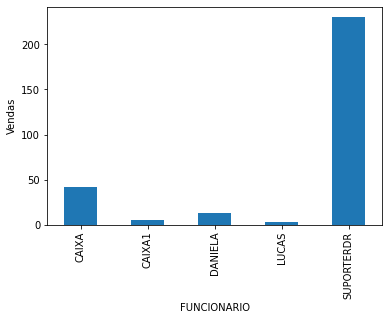

In [26]:
funcionarios_venda.head(10).plot.bar(ylabel='Vendas')